전통적인 vision 모델인 CNN부터, stable diffusion 모델(text -> image)과 llama vision (image -> text) 모델을 테스트해보았습니다.

## CNN 모델 학습

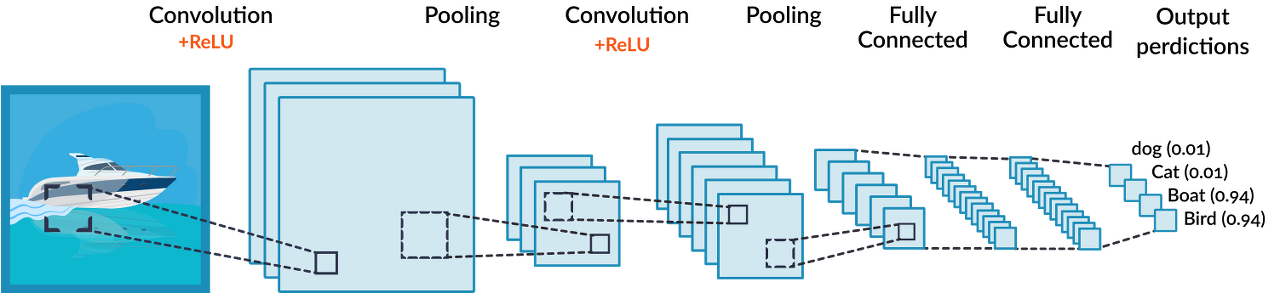

170498071/170498071 [==============================] - 3s 0us/step
Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Training labels shape: (50000, 10)
Testing labels shape: (10000, 10)


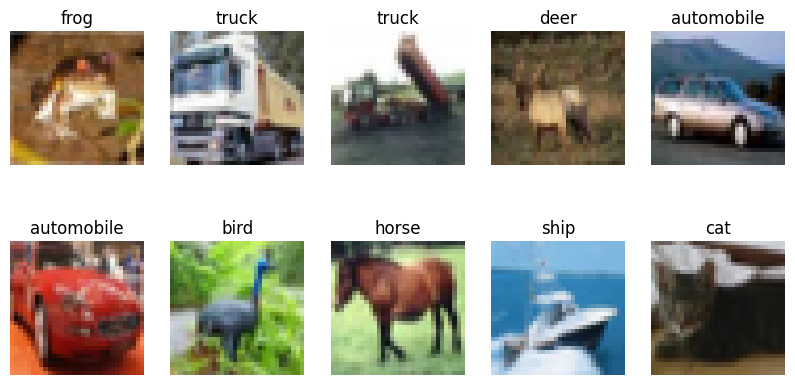

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# CIFAR-10 데이터셋 로드
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 데이터 정규화
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 레이블을 one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 데이터셋 정보 출력
print(f'Training data shape: {x_train.shape}')
print(f'Testing data shape: {x_test.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Testing labels shape: {y_test.shape}')

# 데이터 시각화 (첫 번째 10개 이미지)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[int(y_train[i].argmax())])
    plt.axis('off')
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 간단한 CNN 모델 정의
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# 모델 성능 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


Epoch 1/10
625/625 [==============================] - 59s 91ms/step - loss: 1.7052 - accuracy: 0.3705 - val_loss: 1.3804 - val_accuracy: 0.5001
Epoch 2/10
625/625 [==============================] - 51s 81ms/step - loss: 1.3426 - accuracy: 0.5202 - val_loss: 1.1724 - val_accuracy: 0.5791
Epoch 3/10
625/625 [==============================] - 54s 87ms/step - loss: 1.1905 - accuracy: 0.5792 - val_loss: 1.0999 - val_accuracy: 0.6137
Epoch 4/10
625/625 [==============================] - 57s 91ms/step - loss: 1.0789 - accuracy: 0.6228 - val_loss: 0.9597 - val_accuracy: 0.6582
Epoch 5/10
625/625 [==============================] - 55s 89ms/step - loss: 0.9927 - accuracy: 0.6525 - val_loss: 0.9739 - val_accuracy: 0.6605
Epoch 6/10
625/625 [==============================] - 51s 82ms/step - loss: 0.9195 - accuracy: 0.6797 - val_loss: 0.8863 - val_accuracy: 0.6894
Epoch 7/10
625/625 [==============================] - 54s 87ms/step - loss: 0.8605 - accuracy: 0.7028 - val_loss: 0.8507 - val_accuracy:

1/1 [==============================] - 0s 124ms/step


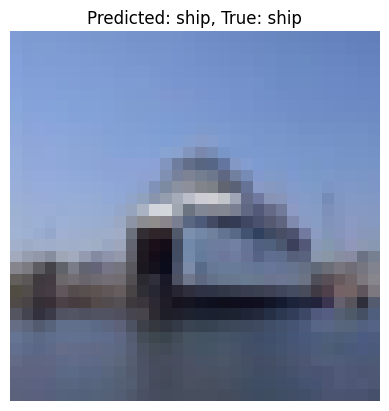

In [ ]:
import numpy as np

# 테스트 셋에서 이미지 하나를 선택
idx = np.random.randint(0, x_test.shape[0])
img = x_test[idx]

# 이미지 예측
pred = model.predict(np.expand_dims(img, axis=0))
pred_class = np.argmax(pred)

# 결과 시각화
plt.imshow(img)
plt.title(f'Predicted: {class_names[pred_class]}, True: {class_names[np.argmax(y_test[idx])]}')
plt.axis('off')
plt.show()


## Stable Diffusion

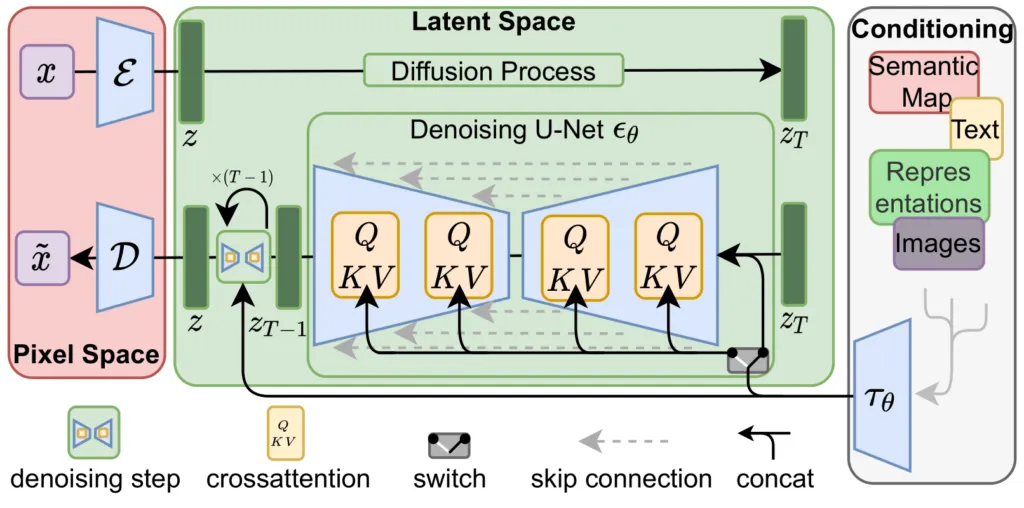

In [ ]:
%pip install diffusers
%pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 6.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux

In [ ]:
from torch import autocast
from diffusers import StableDiffusionPipeline

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained(
	"CompVis/stable-diffusion-v1-4",
	use_auth_token=True
).to("cuda")

In [ ]:
prompt = "a photo of an astronaut riding a dragon on mars, with a candy in his hand"
image = pipe(prompt)['images'][0]

  0%|          | 0/50 [00:00<?, ?it/s]

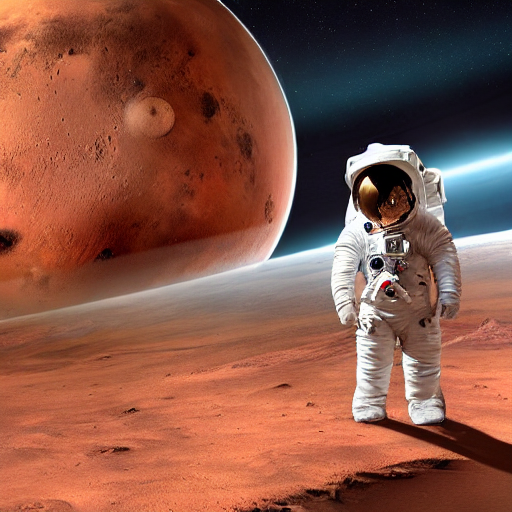

In [ ]:
image

  0%|          | 0/50 [00:00<?, ?it/s]

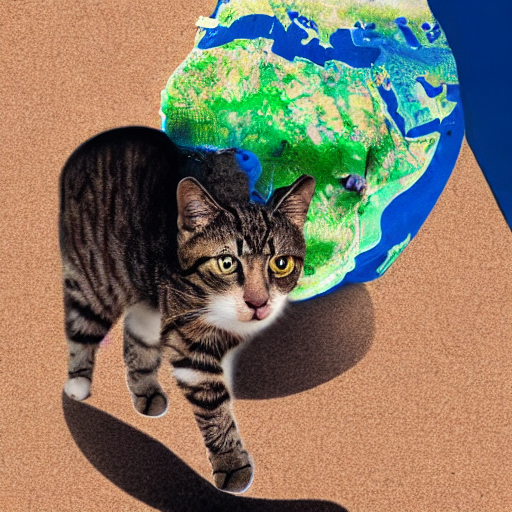

In [ ]:
prompt = "a photo of a cat-dominated earth"
image = pipe(prompt)['images'][0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

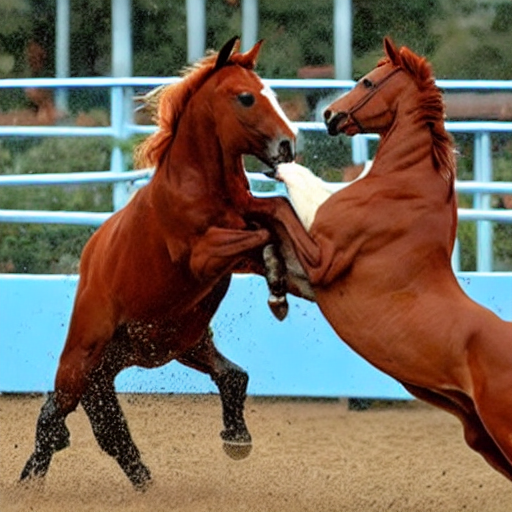

In [ ]:
prompt = "a photo that shows who wins when a horse and a cat fight"
image = pipe(prompt)['images'][0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

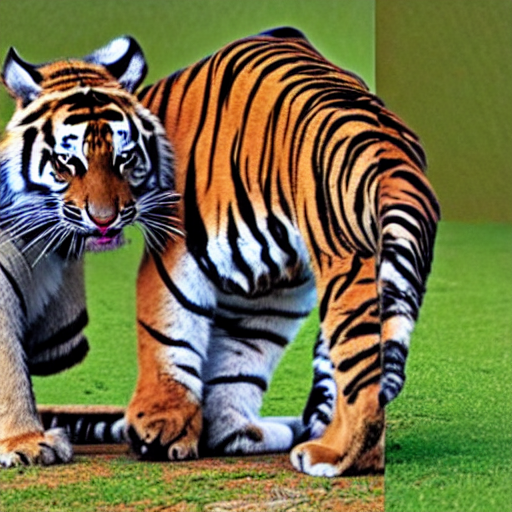

In [ ]:
prompt = "a photo that shows who wins when a TIGER and a CAT fight" # 질문이 너무 어려운가?
image = pipe(prompt)['images'][0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

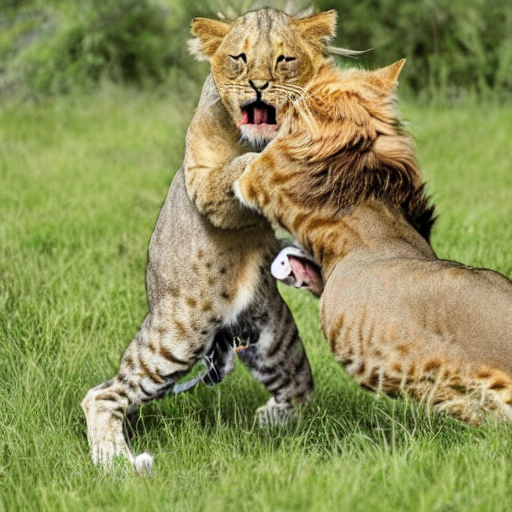

In [ ]:
prompt = "a photo of a battle between a cat and a lion"
image = pipe(prompt)['images'][0]
image

## Llama3 Vision

In [ ]:
%pip install accelerate
%pip install -i https://pypi.org/simple/ bitsandbytes

In [ ]:
import torch
from PIL import Image
from transformers import AutoModelForCausalLM, AutoTokenizer
from transformers import BitsAndBytesConfig


bnb_cfg = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    llm_int8_skip_modules=["mm_projector", "vision_model"],
)

model_id = "qresearch/llama-3-vision-alpha-hf"
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    trust_remote_code=True,
    torch_dtype=torch.float16,
    quantization_config=bnb_cfg,
)

tokenizer = AutoTokenizer.from_pretrained(
    model_id,
    use_fast=True,
)



우선 논문에서 사진 + 사진의 캡션을 캡처한 다음의 사진으로 물어보겠습니다
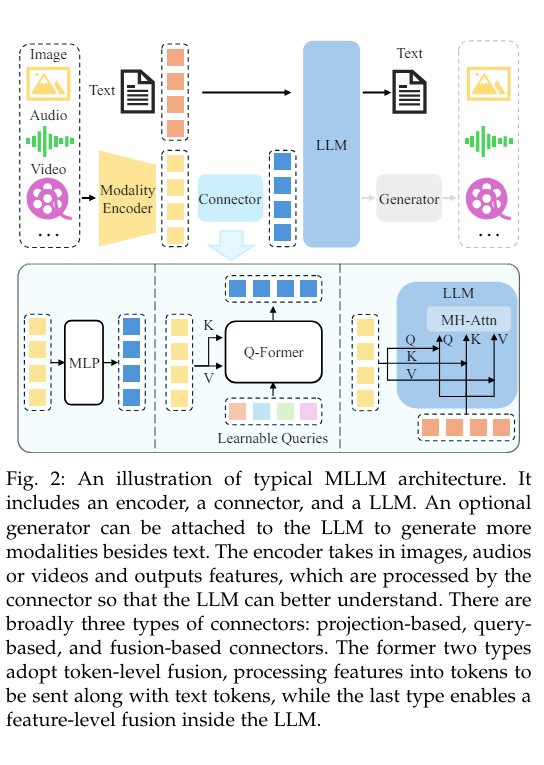

In [8]:
from PIL import Image
import numpy as np

image = Image.open("/content/MLLM.png")

print("Image size (width, height):", image.size)

# Convert the PIL Image to a NumPy array
image_np = np.array(image)

# Print the shape of the NumPy array
print("Image shape:", image_np.shape)

# Convert RGBA to RGB if necessary (바꾸지 않으면 오류)
if image_np.shape[-1] == 4:
    image_np = image_np[..., :3]

# Print the new shape after conversion
print("New image shape:", image_np.shape)

# Proceed with the model prediction
print(
    tokenizer.decode(
        model.answer_question(image_np, "Please explain what's in this picture", tokenizer),
        skip_special_tokens=True,
    )
)


Image size (width, height): (544, 765)
Image shape: (765, 544, 4)
New image shape: (765, 544, 3)


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


This picture appears to be a diagram illustrating the architecture of a system for multimedia learning. The diagram shows how different components interact to enable the connection between text and images.

Here's a breakdown of the diagram:

* The system includes an illustration of an encoder that connects text and images.
* The encoder is shown to be connected to a generator that produces additional graphical elements.
* The system also includes a processor that takes in images and text, and produces output based on the processed information.
* The diagram also shows a connection to a database that stores information about the images and text.
* The system is designed to be able to better understand the meaning of text and images, and to generate better output based on that understanding.

Overall, the diagram appears to be illustrating a system for multimedia learning that uses a combination of natural language processing and computer vision techniques to connect text and images.


In [10]:
import time
start = time.time()
print(
    tokenizer.decode(
        model.answer_question(image_np, "What's the difference between normal LLM and MLLM?", tokenizer),
        skip_special_tokens=True,
    )
)
print(time.time() - start)

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


The main difference between a normal LLM (Large Language Model) and MLLM (Multimodal Language Model) is the type of data used to train the model.

A normal LLM is trained on text data alone, whereas an MLLM is trained on a combination of text, images, and other multimedia data. This allows the MLLM to learn to generate text that is more descriptive and contextual, as well as to understand the relationships between different modalities (e.g., text and images).

In the case of the MLLM, the training data includes a large corpus of text, images, and other multimedia data, which allows the model to learn to generate text that is more descriptive and contextual. The model can also learn to recognize and generate different types of multimedia content, such as images, videos, and audio files.

Overall, the main difference between a normal LLM and an MLLM is the type of data used to train the model, which affects the model's ability to generate text that is more descriptive and contextual.
13.

예상보다도 더 잘 답변하네요, 그래프나 표도 읽을 수 있나 질문해보겠습니다. 테스트해볼 사진들은 다음과 같습니다.


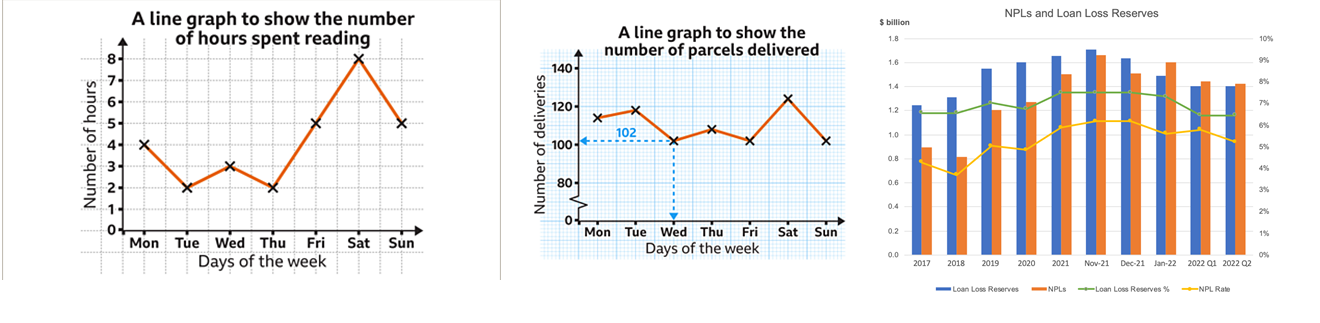

In [11]:
from PIL import Image
import numpy as np

image = Image.open("/content/line graph.png")

print("Image size (width, height):", image.size)

image_np = np.array(image)
print("Image shape:", image_np.shape)
if image_np.shape[-1] == 4:
    image_np = image_np[..., :3]
    print("New image shape:", image_np.shape)

print(
    tokenizer.decode(
        model.answer_question(image_np, "Please explain what's in this picture", tokenizer),
        skip_special_tokens=True,
    )
)


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Image size (width, height): (480, 270)
Image shape: (270, 480, 3)
New image shape: (270, 480, 3)
The picture appears to be a graph showing the number of hours spent reading on a line graph. The x-axis represents the number of hours spent reading, and the y-axis represents the number of days of the week.

The graph shows that the number of hours spent reading increases as the day of the week progresses. For example, on Monday, the number of hours spent reading is relatively low, but by Thursday, the number of hours spent reading has increased significantly.

It's likely that the graph is showing the average number of hours spent reading by a group of people or students over a period of time, with each day of the week representing a different data point.

If you have any specific questions about the graph or what it might represent, feel free to ask!


x축과 y축을 반대로 읽었네요. 화요일 - 월요일의 수치도 반대로 읽었습니다.

In [12]:
from PIL import Image
import numpy as np

image = Image.open("/content/line graph2.png")

print("Image size (width, height):", image.size)

image_np = np.array(image)
print("Image shape:", image_np.shape)
if image_np.shape[-1] == 4:
    image_np = image_np[..., :3]
    print("New image shape:", image_np.shape)

print(
    tokenizer.decode(
        model.answer_question(image_np, "Please explain what's in this picture", tokenizer),
        skip_special_tokens=True,
    )
)


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Image size (width, height): (480, 270)
Image shape: (270, 480, 3)
This picture appears to be a graph showing the number of packages delivered over a period of time. The x-axis represents the number of packages delivered, and the y-axis represents the time of day or week.

The graph shows a steady increase in the number of packages delivered over the course of the week, with a slight dip on wednesday and a slight spike on friday.

The graph also shows the number of packages delivered on each day of the week, with monday and friday having the highest numbers and sunday having the lowest number.

Overall, the graph suggests that the number of packages delivered increases steadily over the course of the week, with some fluctuations on individual days.


마찬가지로 다 반대로 읽네요.

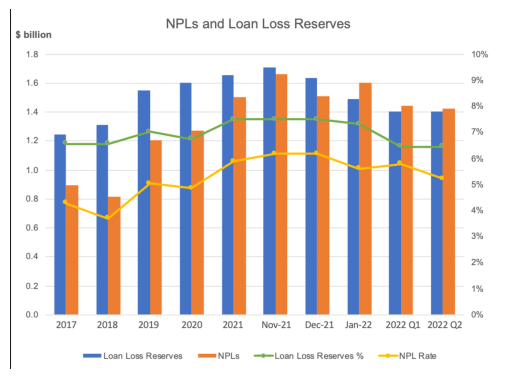

In [19]:
import matplotlib.pyplot as plt
image = Image.open("/content/bar chart and line graph.png")

print("Image size (width, height):", image.size)

image_np = np.array(image)
print("Image shape:", image_np.shape)
if image_np.shape[-1] == 4:
    image_np = image_np[..., :3]
    print("New image shape:", image_np.shape)
plt.imshow(image_np)
plt.axis('off')  # Hide axes
plt.show()


In [21]:
# 두 번이나 했는데 자꾸 오류가 나네요..
start = time.time()
print(
    tokenizer.decode(
        model.answer_question(image_np, "Please explain what's in this picture", tokenizer),
        skip_special_tokens=True,
    )
)
print(time.time() - start)

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


This graph shows the growth of financial resources and the impact of interest rates on the economy.

The graph shows the growth of financial resources (blue line) and the impact of interest rates on the economy (red line).

The blue line represents the growth of financial resources, which has been increasing steadily over the past few years.

The red line represents the impact of interest rates on the economy, which has been decreasing steadily over the past few years.

The graph also shows the impact of interest rates on the economy, which has been decreasing steadily over the past few years.

The graph also shows the impact of interest rates on the economy, which has been decreasing steadily over the past few years.

The graph also shows the impact of interest rates on the economy, which has been decreasing steadily over the past few years.

The graph also shows the impact of interest rates on the economy, which has been decreasing steadily over the past few years.

The graph also sh

In [22]:
start = time.time()
print(
    tokenizer.decode(
        model.answer_question(image_np, "Please explain what happened in 2021", tokenizer),
        skip_special_tokens=True,
    )
)
print(time.time() - start)

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


The graph shows the growth of non - performing loans and reserves in the banking system.

Non - performing loans (NPLs) are loans that have not been repaid or are in default. In the graph, NPLs are shown as a percentage of total loans.
Reserves are the amount of money set aside by banks to cover potential loan losses.

In 2021, the growth of NPLs slowed down, and the growth of reserves increased.
This is because the economy has been growing steadily, and the risk of loan defaults has decreased.
As a result, banks have been able to reduce their reserve requirements and increase their lending capacity.

The graph also shows the growth of deposits, which are the amount of money deposited into bank accounts.
Deposits have been growing steadily, which is a sign of confidence in the banking system and the economy.

Overall, the graph suggests that the banking system is in a stable state, with a growing economy and a decreasing risk of loan defaults.
This is a positive sign for the economy an

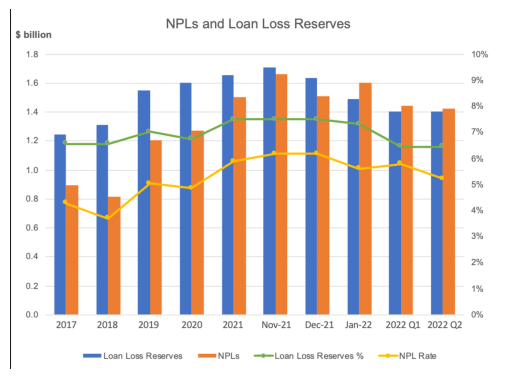

In [23]:
plt.imshow(image_np)
plt.axis('off')  # Hide axes
plt.show()

In [24]:
start = time.time()
print(
    tokenizer.decode(
        model.answer_question(image_np, "Refer to the given image, compare 2022 Q1 and 2022 Q2", tokenizer),
        skip_special_tokens=True,
    )
)
print(time.time() - start)

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


The graph shows the growth of non - performing loans and reserves in the first and second quarters of 2022.

In the first quarter, non - performing loans increased by 10 %, while reserves grew by 5 %.
In the second quarter, non - performing loans increased by 12 %, while reserves grew by 6 %.

The graph also shows the total reserves, which increased by 11 % in the first quarter and by 14 % in the second quarter.

The growth in non - performing loans and reserves is a sign of the company's efforts to improve its financial health and increase its ability to absorb potential losses.

The graph does not provide information on the specific reasons for the growth in non - performing loans and reserves, but it suggests that the company is taking steps to address these issues and improve its financial performance.

It is important to note that the graph only shows the growth in non - performing loans and reserves, and does not provide a complete picture of the company's financial performance.


이번엔 노드와 엣지가 있는 그래프로 한 번 물어볼게요.

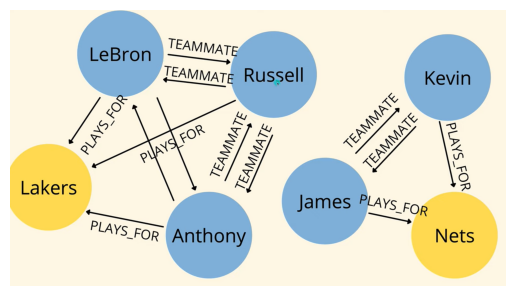

In [26]:
plt.imshow(image_np)
plt.axis('off')  # Hide axes
plt.show()

In [25]:
image = Image.open("/content/image.png")

print("Image size (width, height):", image.size)

image_np = np.array(image)
print("Image shape:", image_np.shape)
if image_np.shape[-1] == 4:
    image_np = image_np[..., :3]
    print("New image shape:", image_np.shape)

print(
    tokenizer.decode(
        model.answer_question(image_np, "Please explain every relations you can see here in image", tokenizer),
        skip_special_tokens=True,
    )
)
# 그래프 자체에 대한 설명이네요.

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Image size (width, height): (1266, 705)
Image shape: (705, 1266, 4)
New image shape: (705, 1266, 3)
Here's a breakdown of the relationships in the diagram :

* The circles represent players (e.g. person, person, etc.)
* The lines connecting the circles represent relationships between the players
* The arrows on the lines indicate the direction of the relationship (e.g. person plays for person )
* The squares represent teams (e.g. sports team, sports team, etc.)
* The lines connecting the circles to the squares represent the players playing for the teams

In this diagram, you can see that:

* person plays for sports team
* person plays for sports team
* person plays for sports team
* person plays for sports team

And so on...

Let me know if you have any specific questions about the diagram!


In [27]:
print(
    tokenizer.decode(
        model.answer_question(image_np, "Please explain every specific relations you can see here in image", tokenizer),
        skip_special_tokens=True,
    )
)
# 더 자세히 대답해줍니다.

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Here's a breakdown of the diagram :

* The diagram shows a network of relationships between various entities in the world of basketball.
* The main entities are the teams (represented by the squares) and the players (represented by the circles).
* The arrows between the squares and circles represent the relationships between the teams and players.
* The diagram shows that each team has a set of players, and each player is associated with a specific team.
* The diagram also shows that each player has a set of skills or attributes (represented by the lines connecting the circles to the squares).
* The diagram does not show any relationships between the players themselves, only between the players and the teams they play for.

In this diagram, the teams are represented by the squares, and the players are represented by the circles.
The arrows between the squares and circles represent the relationships between the teams and players.
The diagram shows that each team has a set of players, an

In [28]:
print(
    tokenizer.decode(
        model.answer_question(image_np, "Find all nodes in this image", tokenizer),
        skip_special_tokens=True,
    )
)
# 왜 이름을 말 안 해줄까요?

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Here is the diagram of the nodes in the image :

* Players : basketball player, basketball player, etc.
* Teams : basketball team, basketball team, etc.
* Roles : point guard, shooting guard, etc.
* Positions : power forward, small forward, etc.
* Teams : basketball team, basketball team, etc.
* Roles : point guard, shooting guard, etc.
* Positions : power forward, small forward, etc.

Let me know if you have any further questions!


In [29]:
print(
    tokenizer.decode(
        model.answer_question(image_np, "Name the players in this image", tokenizer),
        skip_special_tokens=True,
    )
)
# 이렇게 물어봐도 대답을 안 해줍니다.

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Here is the image with the players named :

* plays for
* plays for
* plays for
* plays for

Let me know if you have any other questions!


In [30]:
# 글을 못 읽었나?
print(
    tokenizer.decode(
        model.answer_question(image_np, "Read every text you see in the picture", tokenizer),
        skip_special_tokens=True,
    )
)

# 고장나네요..

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


*reads every text you see in the picture*

The diagram shows the connections between players and teams.
*points to the diagram*

It shows how players are connected to their teams and how teams are connected to each other through players.
*points to the diagram again*

It also shows how players are connected to each other through their teams.
*points to the diagram once more*

It's a complex web of connections that shows how players and teams are connected to each other.
*points to the diagram*

It's a visual representation of the connections between players and teams.
*points to the diagram*

It's a diagram that shows the connections between players and teams.
*points to the diagram*

It's a diagram that shows the connections between players and teams.
*points to the diagram*

It's a diagram that shows the connections between players and teams.
*points to the diagram*

It's a diagram that shows the connections between players and teams.
*points to the diagram*

It's a diagram that show